In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams, style, font_manager, rc
import matplotlib as mpl

In [2]:
# 한글폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
# 마이너스 깨질 때
mpl.rcParams['axes.unicode_minus']=False

In [4]:
colors = ['red','orange','green','skyblue','blue','navy','purple','pink','olive','brown','gray','cyan','lightgreen','salmon','violet','orchid'
         ,'magenta','yellow','lime','limegreen','linen','maroon','mediumaquamarine','aquamarine','lawngreen']
EPS = [0.0001,0.0005,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.05,0.1,0.5]

# 1.데이터 준비
## 1) 데이터 확인

In [5]:
# busan = pd.read_csv('C:/studyBigdata/Five-Gs_BigData/data/소상공인시장진흥공단_상가(상권)정보_부산_202206.csv')
busan = pd.read_csv('./data/소상공인시장진흥공단_상가(상권)정보_부산_202206.csv')
busan.head(1)

상가업소번호  상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명 상권업종소분류코드  \
0  23206623  미광장  NaN         O       숙박       O02  모텔/여관/여인숙    O02A01   

    상권업종소분류명 표준산업분류코드  ...                     건물관리번호  건물명  \
0  모텔/여관/여인숙   I55112  ...  2611012600100250001004473  NaN   

                 도로명주소   구우편번호    신우편번호  동정보  층정보  호정보          경도         위도  
0  부산광역시 중구 보수대로44번길 5  600074  48974.0  NaN  NaN  NaN  129.023668  35.100979  

[1 rows x 39 columns]

In [6]:
busan.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
busan.상권업종중분류명.unique()

array(['모텔/여관/여인숙', '닭/오리요리', '의복의류', '한식', '사진', '가정/주방/인테리어', '유흥주점',
       '물품기기대여', '선물/팬시/기념품', '이/미용/건강', '음/식료품소매', '커피점/카페', '학원-어학',
       '자동차/자동차용품', '실내운동시설', '사무/문구/컴퓨터', '세탁/가사서비스', '자동차/이륜차',
       '운동/경기용품소매', 'PC/오락/당구/볼링등', '양식', '종합소매점', '중식', '학원-보습교습입시',
       '패스트푸드', '부동산중개', '사진/광학/정밀기기소매', '무도/유흥/가무', '철물/난방/건설자재소매',
       '주유소/충전소', '개인서비스', '의약/의료품소매', '주택수리', '분식', '학원-음악미술무용', '학원기타',
       '도서관/독서실', '페인트/유리제품소매', '일식/수산물', '가전제품소매', '화장품소매', '가방/신발/액세서리',
       '예술품/골동품/수석/분재', '가구소매', '대중목욕탕/휴게', '스포츠/운동', '시계/귀금속소매', '유아교육',
       '건강/미용식품', '기타판매업', '호텔/콘도', '중고품소매/교환', '책/서적/도서', '캠프/별장/펜션',
       '개인/가정용품수리', '별식/퓨전요리', '요가/단전/마사지', '인력/고용/용역알선', '제과제빵떡케익',
       '학문교육기타', '운송/배달/택배', '기타음식업', '광고/인쇄', '학원-예능취미체육', '분양',
       '취미/오락관련소매', '연극/영화/극장', '예식/의례/관혼상제', '부페', '유아용품', '법무세무회계',
       '기타서비스업', '경마/경륜/성인오락', '실외운동시설', '운영관리시설', '애견/애완/동물', '대행업',
       '학원-컴퓨터', '민박/하숙', '평가/개발/관리', '학원-자격/국가고시', '학원-창업취업취미',
       '놀이/여가/취미',

## 2)데이터 정제

In [8]:
cafe = busan[busan['상권업종중분류명'] == '커피점/카페']
cafe.head(1)

상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
15  20526716  투썸플레이스  대연점         Q       음식       Q12   커피점/카페    Q12A01   

       상권업종소분류명 표준산업분류코드  ...                     건물관리번호  건물명  \
15  커피전문점/카페/다방   I56220  ...  2629010600100760001000452  NaN   

               도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
15  부산광역시 남구 수영로 286  608020  48499.0  NaN   1  NaN  129.097701  35.135963  

[1 rows x 39 columns]

In [9]:
cafe.상권업종소분류명.unique()

array(['커피전문점/카페/다방', '사주카페', '전통찻집/인삼찻집', '생과일주스전문점', '애견카페', '보드게임카페'],
      dtype=object)

In [10]:
cafe = cafe[cafe.상권업종소분류명.isin(['커피전문점/카페/다방','생과일주스전문점','전통찻집/인삼찻집'])]

In [11]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6807 entries, 15 to 152898
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     6807 non-null   int64  
 1   상호명        6807 non-null   object 
 2   지점명        2555 non-null   object 
 3   상권업종대분류코드  6807 non-null   object 
 4   상권업종대분류명   6807 non-null   object 
 5   상권업종중분류코드  6807 non-null   object 
 6   상권업종중분류명   6807 non-null   object 
 7   상권업종소분류코드  6807 non-null   object 
 8   상권업종소분류명   6807 non-null   object 
 9   표준산업분류코드   6807 non-null   object 
 10  표준산업분류명    6807 non-null   object 
 11  시도코드       6807 non-null   int64  
 12  시도명        6807 non-null   object 
 13  시군구코드      6807 non-null   int64  
 14  시군구명       6807 non-null   object 
 15  행정동코드      6807 non-null   int64  
 16  행정동명       6807 non-null   object 
 17  법정동코드      6807 non-null   int64  
 18  법정동명       6807 non-null   object 
 19  지번코드       6807 non-null   int64  
 20  대지구분코

In [12]:
cafe = cafe[['상호명', '지점명', '도로명주소', '시군구명', '지번주소', '경도', '위도']]
cafe.head(5)

상호명  지점명                  도로명주소 시군구명                      지번주소  \
15   투썸플레이스  대연점       부산광역시 남구 수영로 286   남구         부산광역시 남구 대연동 76-1   
69      더리터  수영점    부산광역시 수영구 수영로 396-1  수영구       부산광역시 수영구 남천동 19-28   
97     비움카페  NaN   부산광역시 기장군 기장읍 용궁길 68  기장군  부산광역시 기장군 기장읍 시랑리 416-34   
104     로카페  NaN  부산광역시 기장군 정관읍 정관로 350  기장군     부산광역시 기장군 정관읍 모전리 730   
229     콩카페  NaN       부산광역시 북구 시랑로 137   북구      부산광역시 북구 구포동 1235-12   

             경도         위도  
15   129.097701  35.135963  
69   129.107896  35.141748  
97   129.221668  35.189328  
104  129.164382  35.335824  
229  129.010423  35.195485

In [13]:
cafe.fillna('',inplace=True)

In [14]:
cafe['상호지점명'] = cafe['상호명'] + cafe['지점명']

In [15]:
cafe

상호명    지점명                  도로명주소  시군구명                      지번주소  \
15       투썸플레이스    대연점       부산광역시 남구 수영로 286    남구         부산광역시 남구 대연동 76-1   
69          더리터    수영점    부산광역시 수영구 수영로 396-1   수영구       부산광역시 수영구 남천동 19-28   
97         비움카페          부산광역시 기장군 기장읍 용궁길 68   기장군  부산광역시 기장군 기장읍 시랑리 416-34   
104         로카페         부산광역시 기장군 정관읍 정관로 350   기장군     부산광역시 기장군 정관읍 모전리 730   
229         콩카페              부산광역시 북구 시랑로 137    북구      부산광역시 북구 구포동 1235-12   
...         ...    ...                    ...   ...                       ...   
152863     반달커피  부산사직점  부산광역시 동래구 사직북로19번길 13   동래구       부산광역시 동래구 사직동 78-45   
152867  고품격커피공장    신평점      부산광역시 사하구 신산북로 41   사하구         부산광역시 사하구 신평동 383   
152868       카페  드크래프트    부산광역시 해운대구 송정해변로 40  해운대구     부산광역시 해운대구 송정동 297-66   
152895       요기            부산광역시 금정구 무학송로 105   금정구        부산광역시 금정구 부곡동 60-4   
152898      더벤티   사하역점     부산광역시 사하구 낙동대로 280   사하구        부산광역시 사하구 괴정동 1284   

                경도         위도       상호지점명  
15      129.097701  35.135963   투썸플레이스대연점  
69      129.107896  35.141748      더리터수영점  
97      129.221668  35.189328        비움카페  
104     129.164382  35.335824         로카페  
229     129.010423  35.195485         콩카페  
...            ...        ...         ...  
152863  129.059828  35.197325   반달커피부산사직점  
152867  128.968087  35.092286  고품격커피공장신평점  
152868  129.201600  35.180614     카페드크래프트  
152895  129.093307  35.240528          요기  
152898  128.984281  35.100133     더벤티사하역점  

[6807 rows x 8 columns]

In [16]:
fc = pd.pivot_table(data = cafe, index='상호명',values='지번주소',aggfunc='count').sort_values(by='지번주소', ascending=False).reset_index()

In [17]:
fc.head(30)

상호명  지번주소
0        카페   299
1     컴포즈커피   133
2      스타벅스    94
3     이디야커피    93
4     하삼동커피    69
5       더벤티    56
6    텐퍼센트커피    54
7        하이    54
8    투썸플레이스    43
9       블루샥    38
10     메가커피    32
11    엔제리너스    29
12      더리터    27
13     커피베이    26
14     텐퍼센트    25
15  메가엠지씨커피    24
16       공차    24
17    할리스커피    23
18    베러먼데이    23
19       컴포    21
20     파스쿠찌    19
21      댄싱컵    17
22     감성커피    16
23   커피에반하다    15
24    카페051    14
25      빽다방    13
26    셀렉토커피    13
27       설빙    13
28     어벤더치    12
29   읍천리382    12

In [18]:
fc_list = [x for x in fc[:50].상호명]
fc_list.remove('카페')
len(fc_list)

49

In [19]:
cafe = cafe[~cafe.상호지점명.str.contains('|'.join(fc_list))]

In [20]:
pd.pivot_table(data = cafe, index='상호명',values='지번주소',aggfunc='count').sort_values(by='지번주소', ascending=False).reset_index().head()

상호명  지번주소
0     카페   239
1    커피빈     9
2  커피스토어     9
3  스몰굿커피     9
4   커피나무     8

In [21]:
gu_cafe = pd.pivot_table(data = cafe, index='시군구명',values='지번주소',aggfunc='count').sort_values(by='지번주소').reset_index()

In [22]:
gu_cafe

시군구명  지번주소
0     서구   139
1    영도구   171
2     동구   196
3    연제구   214
4    사상구   218
5     중구   239
6     북구   248
7    사하구   276
8    강서구   299
9    동래구   348
10   기장군   363
11    남구   365
12   금정구   399
13   수영구   413
14  해운대구   633
15  부산진구   659

<AxesSubplot:xlabel='시군구명', ylabel='지번주소'>

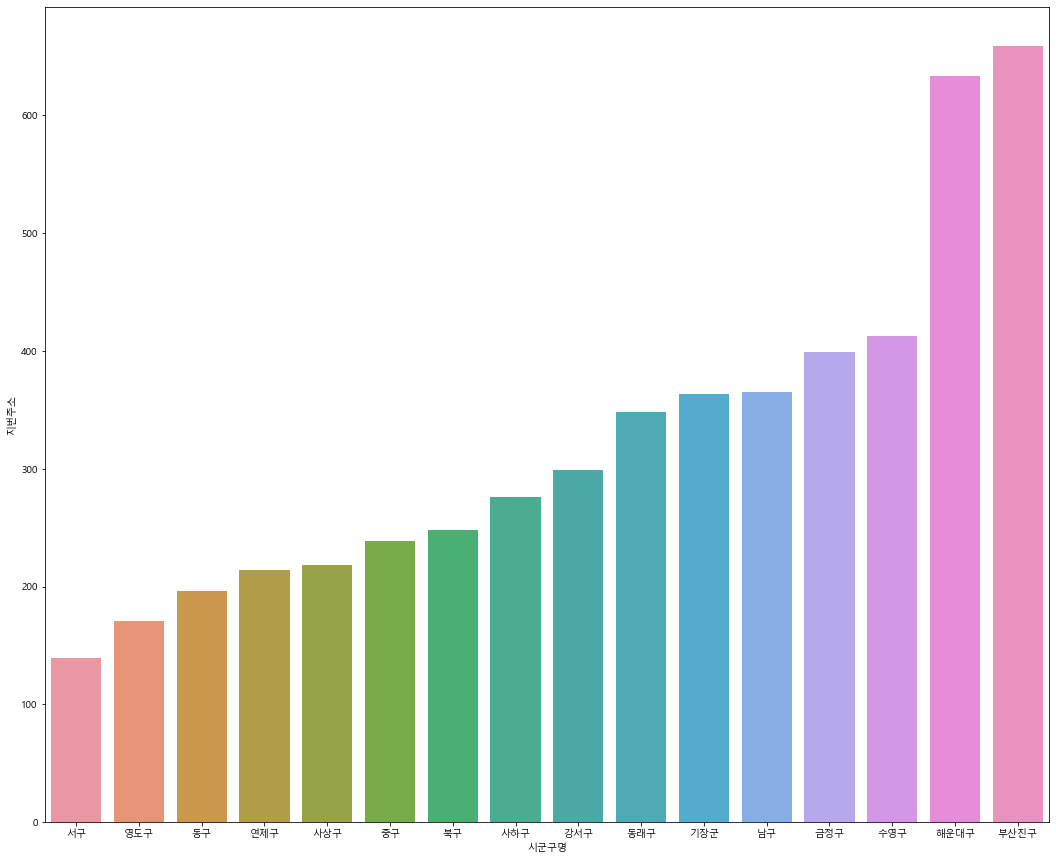

In [23]:
plt.figure(figsize = (18,15))

sns.barplot(data = gu_cafe, x='시군구명',y='지번주소')

프랜차이즈 제거 후에도 부산진구가 압도적으로 많음. 

In [24]:
# 상호명으로브랜드의 개수 세어보기

# cafe_5 = cafe["상호명"].value_counts().iloc[1:6]
# cafe_5

In [25]:
# cafe_data = {'상호명':['컴포즈커피','스타벅스','이디야커피','하삼동커피','더벤티'],
#             '점포수':[133,94,93,69,56]}
# df1 = pd.DataFrame(cafe_data)
# df1

In [26]:
# plt.figure(figsize=(5, 3))
# sns.barplot(data=df1, x='상호명', y='점포수')

## 2)상권 위치 정보 추가

<AxesSubplot:xlabel='경도', ylabel='위도'>

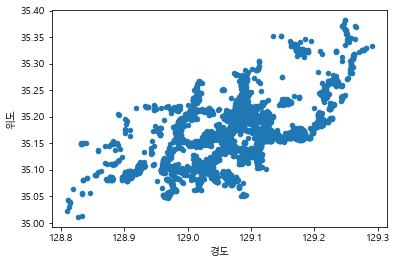

In [27]:
# sactterplot 그리기

cafe[['위도', '경도']].plot.scatter(x='경도', y='위도')

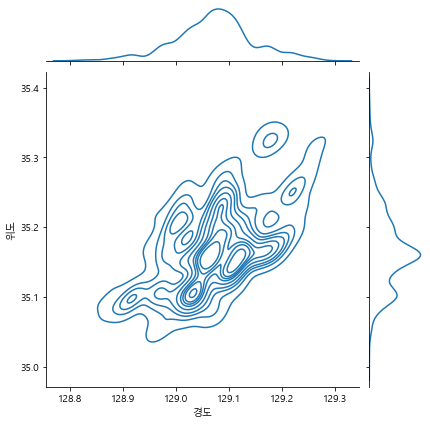

In [28]:
sns.jointplot(data=cafe, x='경도', y='위도', kind='kde')

## 3) 지도 그리기

In [29]:
# folium(지도) 라이브러리 설치
# !pip install folium

In [30]:
# 라이브러리 추가할때 마다 이 셀에 추가
import pandas as pd
import folium

In [31]:
# 상호명으로브랜드의 개수 세어보기

gu = cafe["시군구명"].value_counts()
gu

부산진구    659
해운대구    633
수영구     413
금정구     399
남구      365
기장군     363
동래구     348
강서구     299
사하구     276
북구      248
중구      239
사상구     218
연제구     214
동구      196
영도구     171
서구      139
Name: 시군구명, dtype: int64

In [32]:
cafe

상호명    지점명                  도로명주소  시군구명                      지번주소  \
97        비움카페          부산광역시 기장군 기장읍 용궁길 68   기장군  부산광역시 기장군 기장읍 시랑리 416-34   
104        로카페         부산광역시 기장군 정관읍 정관로 350   기장군     부산광역시 기장군 정관읍 모전리 730   
229        콩카페              부산광역시 북구 시랑로 137    북구      부산광역시 북구 구포동 1235-12   
334     카페황금나무          부산광역시 사상구 사상로342번길 8   사상구       부산광역시 사상구 덕포동 404-2   
405      꼬마대통령    학장점     부산광역시 사상구 학감대로 117   사상구         부산광역시 사상구 학장동 557   
...        ...    ...                    ...   ...                       ...   
152787   연화의바다         부산광역시 기장군 기장읍 연화1길 75   기장군   부산광역시 기장군 기장읍 연화리 304-2   
152804    베어밀크    화명점  부산광역시 북구 금곡대로303번길 36    북구       부산광역시 북구 화명동 2268-3   
152863    반달커피  부산사직점  부산광역시 동래구 사직북로19번길 13   동래구       부산광역시 동래구 사직동 78-45   
152868      카페  드크래프트    부산광역시 해운대구 송정해변로 40  해운대구     부산광역시 해운대구 송정동 297-66   
152895      요기            부산광역시 금정구 무학송로 105   금정구        부산광역시 금정구 부곡동 60-4   

                경도         위도      상호지점명  
97      129.221668  35.189328       비움카페  
104     129.164382  35.335824        로카페  
229     129.010423  35.195485        콩카페  
334     128.985061  35.174925     카페황금나무  
405     128.987618  35.141228   꼬마대통령학장점  
...            ...        ...        ...  
152787  129.224196  35.215145      연화의바다  
152804  129.012011  35.235844    베어밀크화명점  
152863  129.059828  35.197325  반달커피부산사직점  
152868  129.201600  35.180614    카페드크래프트  
152895  129.093307  35.240528         요기  

[5180 rows x 8 columns]

In [33]:
import folium
from folium import plugins

map_busan = folium.Map(location=[ 35.1359, 129.0977], zoom_start=12)

# 구 이름으로 나누기
# 부산진구 = cafe[cafe['시군구명']=='부산진구']
# 해운대구 = cafe[cafe['시군구명']=='해운대구']
사하구 = cafe[cafe['시군구명']=='사하구']

# for shop in range(부산진구.shape[0]):
#     folium.Marker([부산진구['위도'].iloc[shop], 부산진구['경도'].iloc[shop]], popup=부산진구['상호명'].iloc[shop], icon=folium.Icon(color = "blue")).add_to(map_busan)
# 해운대구
# for shop in range(해운대구.shape[0]):
#     folium.Marker([해운대구['위도'].iloc[shop], 해운대구['경도'].iloc[shop]], popup=해운대구['상호명'].iloc[shop], icon=folium.Icon(color = "red")).add_to(map_busan)
# 사하구
for shop in range(사하구.shape[0]):
    folium.Marker([사하구['위도'].iloc[shop], 사하구['경도'].iloc[shop]], popup=사하구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "green")).add_to(map_busan)

map_busan

In [34]:
# 구 이름으로 나누기
부산진구 = cafe[cafe['시군구명']=='부산진구']
# 해운대구 = cafe[cafe['시군구명']=='해운대구']
사하구 = cafe[cafe['시군구명']=='사하구']
동래구 = cafe[cafe['시군구명']=='동래구']
남구 = cafe[cafe['시군구명']=='남구']
금정구 = cafe[cafe['시군구명']=='금정구']
사상구 = cafe[cafe['시군구명']=='사상구']
수영구 = cafe[cafe['시군구명']=='수영구']
북구 = cafe[cafe['시군구명']=='북구']
기장군 = cafe[cafe['시군구명']=='기장군']
연제구 = cafe[cafe['시군구명']=='연제구']
중구 = cafe[cafe['시군구명']=='중구']
동구 = cafe[cafe['시군구명']=='동구']
영도구 = cafe[cafe['시군구명']=='영도구']
서구 = cafe[cafe['시군구명']=='서구']

In [35]:
# 부산진구
for shop in range(부산진구.shape[0]):
    folium.Marker([부산진구['위도'].iloc[shop], 부산진구['경도'].iloc[shop]], popup=부산진구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "blue")).add_to(map_busan)
# # 해운대구
# for shop in range(해운대구.shape[0]):
#     folium.Marker([해운대구['위도'].iloc[shop], 해운대구['경도'].iloc[shop]], popup=해운대구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "red")).add_to(map_busan)
# 사하구
for shop in range(사하구.shape[0]):
    folium.Marker([사하구['위도'].iloc[shop], 사하구['경도'].iloc[shop]], popup=사하구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "green")).add_to(map_busan)
# 동래구
for shop in range(동래구.shape[0]):
    folium.Marker([동래구['위도'].iloc[shop], 동래구['경도'].iloc[shop]], popup=동래구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "yellow")).add_to(map_busan)
# 남구
for shop in range(남구.shape[0]):
    folium.Marker([남구['위도'].iloc[shop], 남구['경도'].iloc[shop]], popup=남구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "black")).add_to(map_busan) 
# 금정구
for shop in range(금정구.shape[0]):
    folium.Marker([금정구['위도'].iloc[shop], 금정구['경도'].iloc[shop]], popup=금정구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "blue")).add_to(map_busan)
# 사상구
for shop in range(사상구.shape[0]):
    folium.Marker([사상구['위도'].iloc[shop], 사상구['경도'].iloc[shop]], popup=사상구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "red")).add_to(map_busan)
# 수영구
for shop in range(수영구.shape[0]):
    folium.Marker([수영구['위도'].iloc[shop], 수영구['경도'].iloc[shop]], popup=수영구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "green")).add_to(map_busan)
# 북구
for shop in range(북구.shape[0]):
    folium.Marker([북구['위도'].iloc[shop], 북구['경도'].iloc[shop]], popup=북구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "yellow")).add_to(map_busan)
# 기장군
for shop in range(기장군.shape[0]):
    folium.Marker([기장군['위도'].iloc[shop], 기장군['경도'].iloc[shop]], popup=기장군['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "black")).add_to(map_busan) 
 # 연제구
for shop in range(연제구.shape[0]):
    folium.Marker([연제구['위도'].iloc[shop], 연제구['경도'].iloc[shop]], popup=연제구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "blue")).add_to(map_busan)
# 중구
for shop in range(중구.shape[0]):
    folium.Marker([중구['위도'].iloc[shop], 중구['경도'].iloc[shop]], popup=중구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "red")).add_to(map_busan)
# 동구
for shop in range(동구.shape[0]):
    folium.Marker([동구['위도'].iloc[shop], 동구['경도'].iloc[shop]], popup=동구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "green")).add_to(map_busan)
# 영도구
for shop in range(영도구.shape[0]):
    folium.Marker([영도구['위도'].iloc[shop], 영도구['경도'].iloc[shop]], popup=영도구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "yellow")).add_to(map_busan)
# 서구
for shop in range(서구.shape[0]):
    folium.Marker([서구['위도'].iloc[shop], 서구['경도'].iloc[shop]], popup=서구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "black")).add_to(map_busan) 

C:\Users\admin\AppData\Local\Temp\ipykernel_17064\2632981511.py:12: UserWarning: color argument of Icon should be one of: {'pink', 'lightgray', 'darkgreen', 'darkpurple', 'darkred', 'lightblue', 'purple', 'beige', 'cadetblue', 'green', 'orange', 'darkblue', 'blue', 'gray', 'red', 'white', 'black', 'lightred', 'lightgreen'}.
  folium.Marker([동래구['위도'].iloc[shop], 동래구['경도'].iloc[shop]], popup=동래구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "yellow")).add_to(map_busan)
C:\Users\admin\AppData\Local\Temp\ipykernel_17064\2632981511.py:27: UserWarning: color argument of Icon should be one of: {'pink', 'lightgray', 'darkgreen', 'darkpurple', 'darkred', 'lightblue', 'purple', 'beige', 'cadetblue', 'green', 'orange', 'darkblue', 'blue', 'gray', 'red', 'white', 'black', 'lightred', 'lightgreen'}.
  folium.Marker([북구['위도'].iloc[shop], 북구['경도'].iloc[shop]], popup=북구['상호명'].iloc[shop], icon=folium.Icon(icon='info-sign', color = "yellow")).add_to(map_busan)
C:\Users\admin\AppData\Lo

In [36]:
map_busan.save('부산광역시 카페.html')

### 지도 시각화(folium)

In [37]:
import folium

#### 전체 카페 분포

In [45]:
cafe

상호명    지점명                  도로명주소  시군구명                      지번주소  \
97        비움카페          부산광역시 기장군 기장읍 용궁길 68   기장군  부산광역시 기장군 기장읍 시랑리 416-34   
104        로카페         부산광역시 기장군 정관읍 정관로 350   기장군     부산광역시 기장군 정관읍 모전리 730   
229        콩카페              부산광역시 북구 시랑로 137    북구      부산광역시 북구 구포동 1235-12   
334     카페황금나무          부산광역시 사상구 사상로342번길 8   사상구       부산광역시 사상구 덕포동 404-2   
405      꼬마대통령    학장점     부산광역시 사상구 학감대로 117   사상구         부산광역시 사상구 학장동 557   
...        ...    ...                    ...   ...                       ...   
152787   연화의바다         부산광역시 기장군 기장읍 연화1길 75   기장군   부산광역시 기장군 기장읍 연화리 304-2   
152804    베어밀크    화명점  부산광역시 북구 금곡대로303번길 36    북구       부산광역시 북구 화명동 2268-3   
152863    반달커피  부산사직점  부산광역시 동래구 사직북로19번길 13   동래구       부산광역시 동래구 사직동 78-45   
152868      카페  드크래프트    부산광역시 해운대구 송정해변로 40  해운대구     부산광역시 해운대구 송정동 297-66   
152895      요기            부산광역시 금정구 무학송로 105   금정구        부산광역시 금정구 부곡동 60-4   

                경도         위도      상호지점명  
97      129.221668  35.189328       비움카페  
104     129.164382  35.335824        로카페  
229     129.010423  35.195485        콩카페  
334     128.985061  35.174925     카페황금나무  
405     128.987618  35.141228   꼬마대통령학장점  
...            ...        ...        ...  
152787  129.224196  35.215145      연화의바다  
152804  129.012011  35.235844    베어밀크화명점  
152863  129.059828  35.197325  반달커피부산사직점  
152868  129.201600  35.180614    카페드크래프트  
152895  129.093307  35.240528         요기  

[5180 rows x 8 columns]

In [41]:
lat = 35.181784
long = 129.052852
(lat, long)

geo_path = './data/busan_gu.json'

import json
geo_json = json.load(open(geo_path, encoding='utf-8'))

In [42]:
geo_json['features'][0]['properties']['name']

'중구'

In [54]:
map = folium.Map([lat, long], zoom_start=12, tiles='Stamen Toner')

for i in cafe.index:
    shop_lat = cafe.loc[i, '위도']
    shop_long = cafe.loc[i, '경도']
    title = f"{cafe.loc[i, '도로명주소']}"
    color = 'blue'
    
    folium.CircleMarker([shop_lat, shop_long], radius=3, color=color, tooltip=title).add_to(map)

map

# 2. 클러스터링 
## DBSCAN

### Test1

In [46]:
import math
import matplotlib.pyplot as plt
import datetime
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as po

colors = ['red','orange','green','skyblue','blue','navy','purple','pink','olive','brown','gray','cyan','lightgreen','salmon','violet','orchid'
         ,'magenta','yellow','lime','limegreen','linen','maroon','mediumaquamarine','aquamarine','lawngreen']
EPS = [0.0001,0.0005,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.05,0.1,0.5]

In [47]:
x_df = cafe[['위도','경도']]

In [48]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.005, min_samples=50, metric='euclidean')
dbscan_labels = dbscan.fit_predict(x_df)

dbscan_labels

array([-1, -1, -1, ...,  6, -1,  1], dtype=int64)

In [49]:
columns = ['상호명','지점명','시군구명','지번주소','위도','경도']

In [50]:
test1 = cafe[columns]
test1['test1_label'] = dbscan_labels
test1.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_17064\2404632971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['test1_label'] = dbscan_labels


상호명  지점명 시군구명                      지번주소         위도          경도  \
97     비움카페       기장군  부산광역시 기장군 기장읍 시랑리 416-34  35.189328  129.221668   
104     로카페       기장군     부산광역시 기장군 정관읍 모전리 730  35.335824  129.164382   
229     콩카페        북구      부산광역시 북구 구포동 1235-12  35.195485  129.010423   
334  카페황금나무       사상구       부산광역시 사상구 덕포동 404-2  35.174925  128.985061   
405   꼬마대통령  학장점  사상구         부산광역시 사상구 학장동 557  35.141228  128.987618   

     test1_label  
97            -1  
104           -1  
229           -1  
334           -1  
405           -1

In [ ]:
# !pip install plotly

In [ ]:
# !pip install nbformat

In [55]:
# !pip install chart_studio

In [51]:
import chart_studio
chart_studio.tools.set_credentials_file(username='username', api_key='api_key')
import chart_studio.plotly as py
import plotly.express as px

In [52]:
busan_cafe = pd.read_csv('./data/busan_cafe.csv')
busan_cafe

Unnamed: 0      상호명 상권업종중분류명   표준산업분류명                  도로명주소  시군구명  \
0             15   투썸플레이스   커피점/카페  비알콜 음료점업       부산광역시 남구 수영로 286    남구   
1             69      더리터   커피점/카페  비알콜 음료점업    부산광역시 수영구 수영로 396-1   수영구   
2             97     비움카페   커피점/카페  비알콜 음료점업   부산광역시 기장군 기장읍 용궁길 68   기장군   
3            104      로카페   커피점/카페  비알콜 음료점업  부산광역시 기장군 정관읍 정관로 350   기장군   
4            229      콩카페   커피점/카페  비알콜 음료점업       부산광역시 북구 시랑로 137    북구   
...          ...      ...      ...       ...                    ...   ...   
6910      152863     반달커피   커피점/카페  비알콜 음료점업  부산광역시 동래구 사직북로19번길 13   동래구   
6911      152867  고품격커피공장   커피점/카페  비알콜 음료점업      부산광역시 사하구 신산북로 41   사하구   
6912      152868       카페   커피점/카페  비알콜 음료점업    부산광역시 해운대구 송정해변로 40  해운대구   
6913      152895       요기   커피점/카페  비알콜 음료점업     부산광역시 금정구 무학송로 105   금정구   
6914      152898      더벤티   커피점/카페  비알콜 음료점업     부산광역시 사하구 낙동대로 280   사하구   

              경도         위도  Dbscan_50m  Dbscan_100m  
0     129.097701  35.135963           0            0  
1     129.107896  35.141748           0            0  
2     129.221668  35.189328          -1           -1  
3     129.164382  35.335824          -1           -1  
4     129.010423  35.195485          -1           -1  
...          ...        ...         ...          ...  
6910  129.059828  35.197325           9           -1  
6911  128.968087  35.092286          -1           -1  
6912  129.201600  35.180614          -1           -1  
6913  129.093307  35.240528           2           -1  
6914  128.984281  35.100133          -1           -1  

[6915 rows x 10 columns]

In [53]:
fig = px.scatter(busan_cafe,
                            x='경도',
                            y='위도',
                            color='Dbscan_100m')
fig.show()